In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("csvs\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [36]:
X = np.array(df[["thalach", "oldpeak"]])
y = np.array(df["target"])

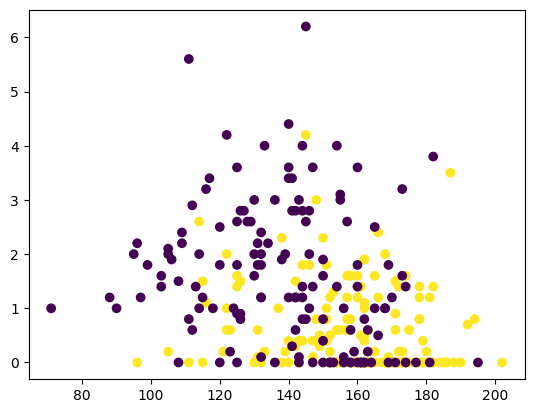

In [33]:
plt.scatter(df.thalach, df.oldpeak, c=y)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X, y)

pred=model.predict(X)
acc=accuracy_score(y, pred)

print(f"Accuracy of Logistic Regression model: {acc}")

Accuracy of Logistic Regression model: 0.7392739273927392


## Visualization of Decision Boundaries

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_14500\4012091111.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


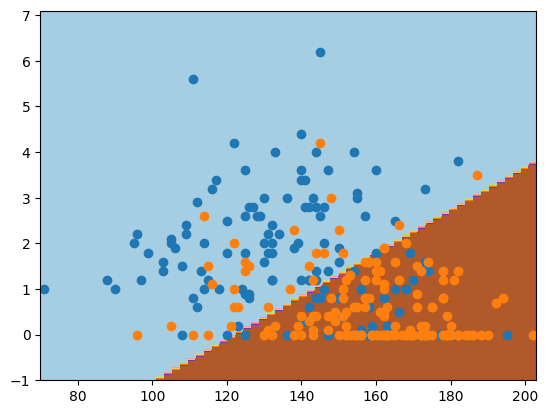

In [37]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#sellecting values for all hyperparemeters
params_grid = {
    "max_depth": [3, 5, 10, 20, 25],  
    "min_samples_split": [5, 10, 15, 20, 25],
    "min_samples_leaf": [5, 10, 15],
    "min_weight_fraction_leaf": [0.05, 0.1, 0.2],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [2, 5, 10, 20, 40],
    "min_impurity_decrease": [0, 0.01, 0.05] #A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

rforest = RandomForestClassifier(random_state=42, n_estimators=20)
grid_search = GridSearchCV(estimator=rforest, param_grid=params_grid, cv=5)

# Define the total number of iterations (combinations of hyperparameters)
total_iterations = len(list(grid_search.get_params()['param_grid'].values())[0])

# Fit the grid search object to the data with tqdm to show the loading bar
with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
    grid_search.fit(X, y)
    pbar.update(1)

best_params = grid_search.best_params_
print(f"Best parameters are: {best_params}")

# 40 minutes to run...
# never again

Grid Search Progress:  20%|██        | 1/5 [37:21<2:29:26, 2241.69s/it]

Best parameters are: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 5, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.05}


## Plotting Accuracies for Different Hyperparameters

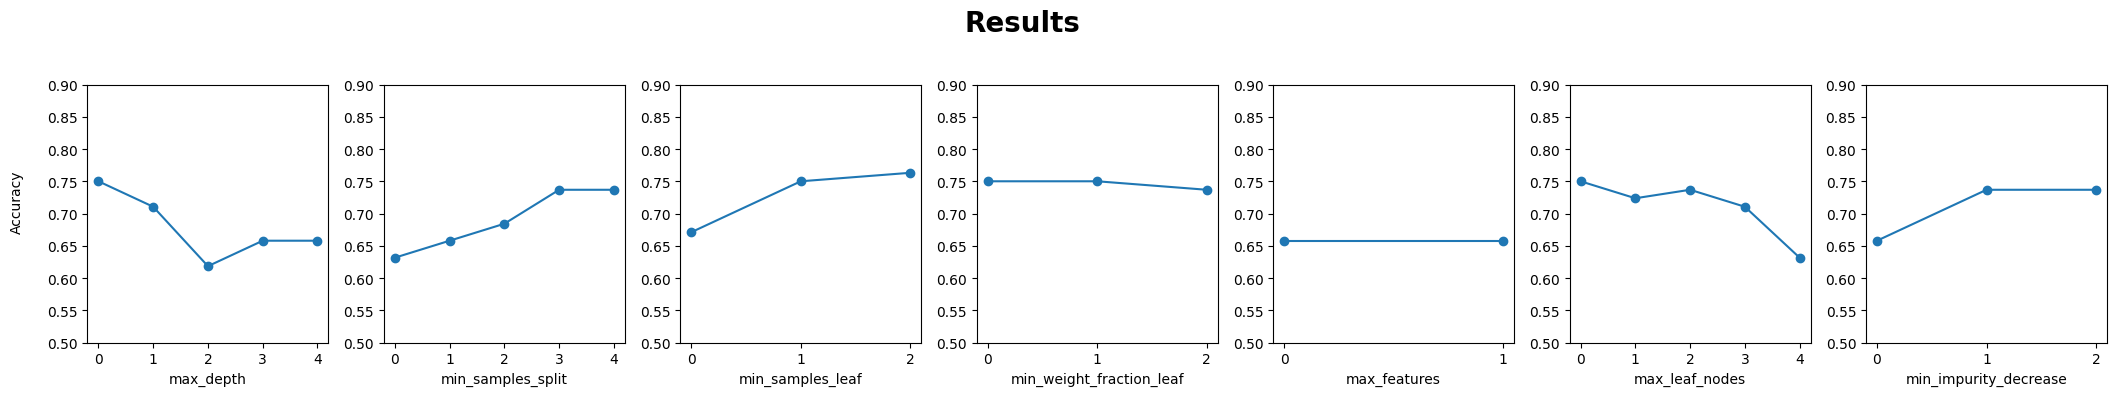

In [43]:
fig, axes = plt.subplots(1, 7, figsize = (22, 4)) #creating subplots
plt.suptitle("Results", fontweight = "bold", fontsize = 20)

"""
Looping thru param keys, selecting the arguments 
for the classifier, fitting, getting accuracies,
than plotting
"""

for key, ax in zip(params_grid.keys(), axes):   
    accuracies = []
    values = list(params_grid[key])
    for value in values:
        args = {key: value, "random_state": 42}
        random_forest = RandomForestClassifier(**args)

        random_forest.fit(X_train, y_train)
        pred = random_forest.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracies.append(acc)

    ax.plot(accuracies, marker="o")

     # Set y-axis limits
    ax.set_ylim(0.5, 0.9)

    # Add x-labels for each subplot
    ax.set_xticks(range(len(values)))
    ax.set_xlabel(key)  # x-label for each subplot
    
fig.text(0.04, 0.5, "Accuracy", va="center", rotation="vertical")

plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # Adjust layout to make space for the y-axis label


#FOR TRAINING DATA#

The graphs are comparable with the ones made with the Decision Tree Classifier, but there is an increase in accuracy


## Best Forest

In [47]:
best_random_forest = RandomForestClassifier(**grid_search.best_params_)

best_random_forest.fit(X_train, y_train)
best_pred = best_random_forest.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)
print(f"Accuracy: {best_acc}")

Accuracy: 0.7368421052631579


In conclusion we can se that the tuned accuracy is slightly better compared to the Decision Tree Clasiffier, and considering that random forest is just a multitute of these clasifiers, it makes sense that the accuracies are at least similar

![forrest](csvs/forrest.jpg) 